In [2]:
#sucrilhos

#! pip install factor_analyzer
!pip show factor_analyzer



Name: factor_analyzer
Version: 0.5.1
Summary: A Factor Analysis tool written in Python
Home-page: https://github.com/EducationalTestingService/factor_analyzer
Author: Jeremy Biggs
Author-email: jeremy.m.biggs@gmail.com
License: 
Location: C:\Users\sbrcmi\AppData\Local\Programs\Python\Python313\Lib\site-packages
Requires: numpy, pandas, scikit-learn, scipy
Required-by: 


In [15]:
from factor_analyzer import FactorAnalyzer
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis

from sklearn import preprocessing
from sklearn.datasets import load_digits

import matplotlib.pyplot as plt






In [1]:
df = pd.read_csv("rte_cereal.csv")
df.head()

NameError: name 'pd' is not defined

In [25]:

df = df.rename(columns={ 'Col1':'Respondente', 'Col2': 'Marca'})
df.head()

,Respondente,Marca,Satisfaz,Natural,Fibra,Doce,Fácil,Sal,Gratificante,Energia,...,Simples,Crocante,Regular,Açúcar,Fruta,Processo,Qualidade,Prazer,Chato,Nutritivo
0,101,25,5,5,5,1,2,1,5,4,...,3,1,4,1,1,3,5,1,1,5
1,101,21,1,2,2,1,5,2,5,1,...,5,5,1,2,1,5,2,1,1,3
2,103,21,5,4,5,5,5,3,5,5,...,1,5,4,3,1,2,5,4,1,5
3,103,3,5,5,5,3,5,2,5,5,...,1,1,4,2,5,2,5,5,1,5
4,104,14,4,5,3,2,5,2,5,4,...,1,5,3,1,1,3,5,5,1,4


In [26]:
df['Marca'] = pd.Categorical(df['Marca']) 
df['Respondente'] = pd.Categorical(df['Respondente']) 
pd.crosstab(index=df['Marca'], columns='count')  

col_0,count
Marca,
1,15
3,13
13,16
14,27
15,14
16,24
17,18
19,21
21,23


In [9]:
pd.crosstab(index=df['Respondente'], columns='count')    


col_0,count
Respondente,
101,2
103,2
104,3
105,3
106,2
...,...
635,2
636,3
637,2


In [10]:
df = df.rename(columns={
'Col3': 'Satisfaz',
'Col4': 'Natural',
'Col5': 'Fibra',
'Col6': 'Doce',
'Col7': 'Fácil',
'Col8': 'Sal',
'Col9': 'Gratificante',
'Col10': 'Energia',
'Col11': 'Divertido',
'Col12': 'Crianças',
'Col13': 'Encharcado',
'Col14': 'Econômico',
'Col15': 'Saúde',
'Col16': 'Família',
'Col17': 'Calorias',
'Col18': 'Simples',
'Col19': 'Crocante',
'Col20': 'Regular',
'Col21': 'Açúcar',
'Col22': 'Fruta',
'Col23': 'Processo',
'Col24': 'Qualidade',
'Col25': 'Prazer',
'Col26': 'Chato',
'Col27': 'Nutritivo'})

In [11]:
df.head()


,Respondente,Marca,Satisfaz,Natural,Fibra,Doce,Fácil,Sal,Gratificante,Energia,...,Simples,Crocante,Regular,Açúcar,Fruta,Processo,Qualidade,Prazer,Chato,Nutritivo
0,101,25,5,5,5,1,2,1,5,4,...,3,1,4,1,1,3,5,1,1,5
1,101,21,1,2,2,1,5,2,5,1,...,5,5,1,2,1,5,2,1,1,3
2,103,21,5,4,5,5,5,3,5,5,...,1,5,4,3,1,2,5,4,1,5
3,103,3,5,5,5,3,5,2,5,5,...,1,1,4,2,5,2,5,5,1,5
4,104,14,4,5,3,2,5,2,5,4,...,1,5,3,1,1,3,5,5,1,4


In [12]:
X = df.iloc[:, 2:27]
X

,Satisfaz,Natural,Fibra,Doce,Fácil,Sal,Gratificante,Energia,Divertido,Crianças,...,Simples,Crocante,Regular,Açúcar,Fruta,Processo,Qualidade,Prazer,Chato,Nutritivo
0,5,5,5,1,2,1,5,4,1,4,...,3,1,4,1,1,3,5,1,1,5
1,1,2,2,1,5,2,5,1,1,5,...,5,5,1,2,1,5,2,1,1,3
2,5,4,5,5,5,3,5,5,5,5,...,1,5,4,3,1,2,5,4,1,5
3,5,5,5,3,5,2,5,5,5,5,...,1,1,4,2,5,2,5,5,1,5
4,4,5,3,2,5,2,5,4,5,5,...,1,5,3,1,1,3,5,5,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,3,4,4,1,4,2,3,3,2,4,...,4,3,4,1,1,3,4,2,2,4
231,5,4,4,3,4,3,4,4,4,4,...,1,4,4,3,4,2,4,4,1,4
232,4,4,4,1,4,1,4,4,3,4,...,3,3,4,1,1,2,3,3,2,4
233,3,3,3,3,4,2,3,3,2,3,...,3,2,3,2,1,3,3,2,2,3


In [2]:
fa = FactorAnalyzer(n_factors=25, rotation='varimax')
fa.fit(X)

# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

NameError: name 'FactorAnalyzer' is not defined

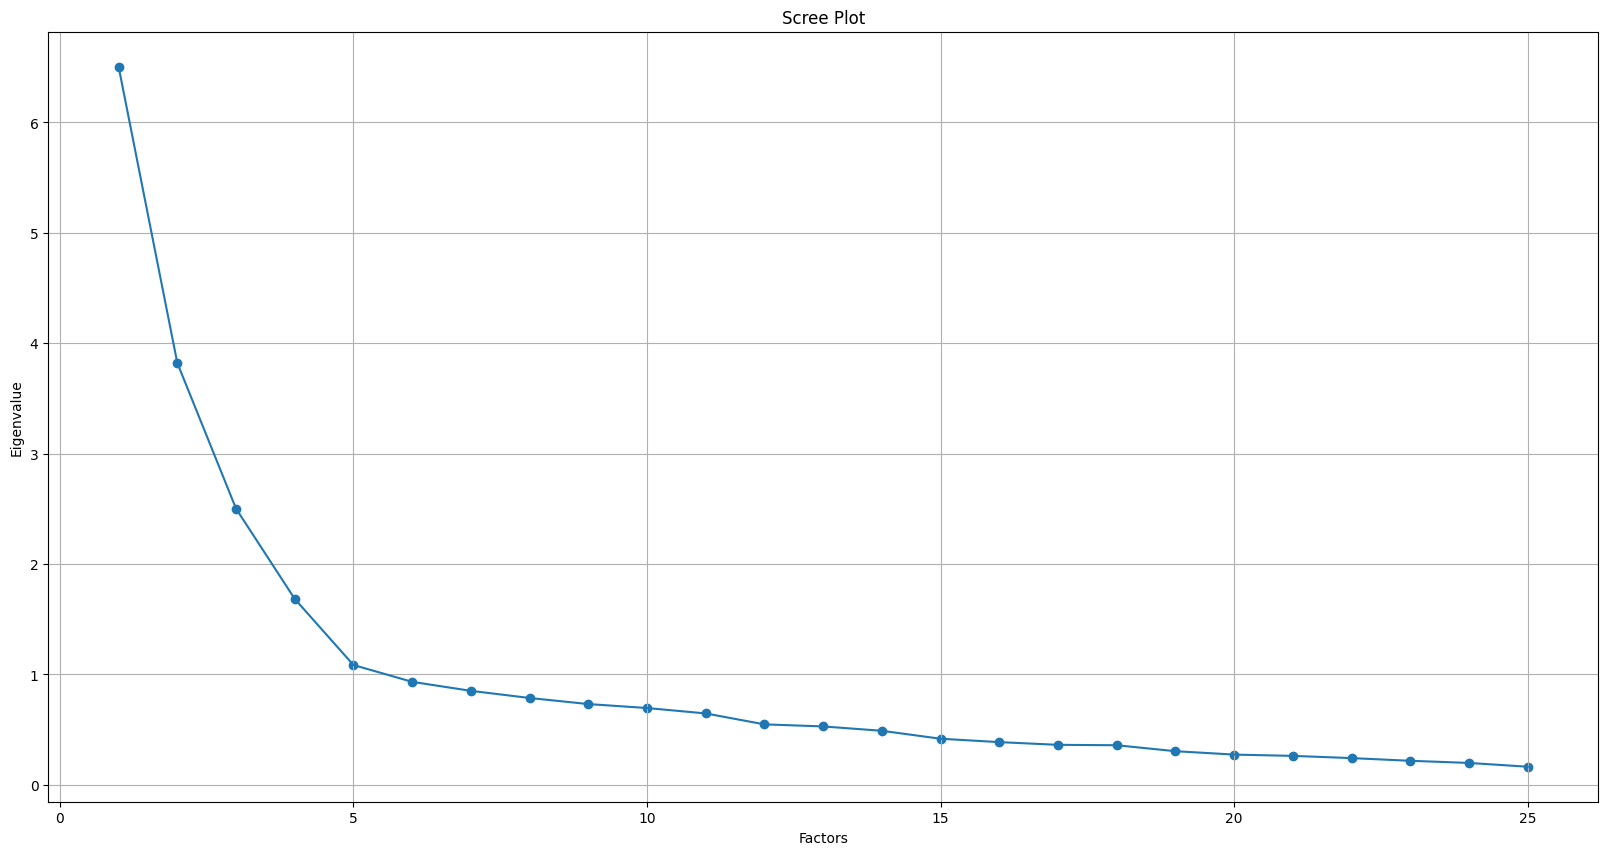

In [28]:
plt.figure(figsize=(20,10))
plt.scatter(range(1,X.shape[1]+1),ev)
plt.plot(range(1,X.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')

plt.grid()
plt.show()

In [30]:
fa = FactorAnalyzer(n_factors=4, rotation='varimax')
fa.fit(X)

C:\Users\sbrcmi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,n_factors,4
,rotation,'varimax'
,method,'minres'
,use_smc,True
,is_corr_matrix,False
,bounds,"(0.005, ...)"
,impute,'median'
,svd_method,'randomized'
,rotation_kwargs,{}


In [31]:
Ln = fa.loadings_
np.round(Ln,2)

array([[ 0.71,  0.09,  0.2 ,  0.15],
       [ 0.75, -0.21,  0.05,  0.04],
       [ 0.82, -0.12, -0.12,  0.02],
       [ 0.07,  0.7 ,  0.07,  0.35],
       [ 0.24,  0.06,  0.32,  0.07],
       [-0.09,  0.69,  0.02, -0.08],
       [ 0.63,  0.08,  0.42,  0.17],
       [ 0.66,  0.08,  0.19,  0.21],
       [ 0.16,  0.18,  0.42,  0.48],
       [-0.02,  0.04,  0.85,  0.01],
       [ 0.03,  0.01,  0.1 , -0.48],
       [ 0.07, -0.28,  0.42, -0.23],
       [ 0.83, -0.29,  0.05,  0.05],
       [ 0.06, -0.05,  0.76,  0.09],
       [-0.11,  0.63, -0.01,  0.12],
       [-0.15, -0.06,  0.07, -0.66],
       [ 0.07,  0.15,  0.37,  0.44],
       [ 0.61, -0.1 , -0.03,  0.09],
       [-0.18,  0.82, -0.05,  0.17],
       [ 0.38,  0.19, -0.27,  0.44],
       [-0.24,  0.37,  0.03, -0.13],
       [ 0.65, -0.24,  0.2 ,  0.17],
       [ 0.24,  0.23,  0.33,  0.6 ],
       [-0.16,  0.07, -0.22, -0.51],
       [ 0.83, -0.18,  0.05,  0.06]])

In [32]:
Ln = pd.DataFrame(fa.loadings_)
np.round(Ln,2)
Ln.index = X.columns
Ln.columns = ['FA1','FA2','FA3','FA4']
Ln

,FA1,FA2,FA3,FA4
Satisfaz,0.705926,0.088167,0.198221,0.152237
Natural,0.752800,-0.208911,0.054740,0.036777
Fibra,0.821203,-0.116397,-0.120859,0.020583
Doce,0.068946,0.701790,0.071968,0.347628
Fácil,0.238564,0.063576,0.324555,0.065804
Sal,-0.091826,0.685617,0.015718,-0.083106
Gratificante,0.625896,0.076987,0.422415,0.172316
Energia,0.659684,0.078210,0.191243,0.210825
Divertido,0.163479,0.176578,0.415016,0.480073
Crianças,-0.024322,0.035050,0.850781,0.013842


In [37]:
Ln.sort_values(by='FA3',ascending=False).head(25)

,FA1,FA2,FA3,FA4
Crianças,-0.024322,0.035050,0.850781,0.013842
Família,0.062455,-0.054532,0.760629,0.093225
Gratificante,0.625896,0.076987,0.422415,0.172316
Econômico,0.068874,-0.280265,0.416057,-0.227187
Divertido,0.163479,0.176578,0.415016,0.480073
Crocante,0.073932,0.145985,0.370988,0.437885
Prazer,0.244884,0.233365,0.333632,0.603503
Fácil,0.238564,0.063576,0.324555,0.065804
Qualidade,0.646587,-0.244715,0.203617,0.171207
Satisfaz,0.705926,0.088167,0.198221,0.152237


In [39]:
fa = FactorAnalyzer(n_factors=4, rotation='varimax')
fa.fit(X)

FactorAnalyzer(n_factors=4, rotation='varimax', rotation_kwargs={})

In [40]:
np.round(fa.get_communalities(),2)

array([0.57, 0.61, 0.7 , 0.62, 0.17, 0.49, 0.61, 0.52, 0.46, 0.73, 0.24,
       0.31, 0.77, 0.59, 0.42, 0.46, 0.36, 0.39, 0.73, 0.44, 0.21, 0.55,
       0.59, 0.34, 0.73])

In [22]:
L = pd.DataFrame(fa.loadings_)
np.round(L,2)
L.index = X.columns
L.columns = ['FA1','FA2','FA3','FA4']
L

,FA1,FA2,FA3,FA4
Satisfaz,0.720938,0.101951,-0.066965,0.184235
Natural,0.731082,-0.239403,-0.107774,0.106261
Fibra,0.723365,-0.237338,-0.309508,0.166049
Doce,0.084747,0.742819,-0.206775,0.146866
Fácil,0.315745,0.142774,0.198440,0.105655
Sal,-0.208298,0.505330,-0.142123,0.408303
Gratificante,0.720826,0.180861,0.158261,0.168681
Energia,0.697706,0.130823,-0.066443,0.118317
Divertido,0.387895,0.491766,0.205831,-0.161091
Crianças,0.217521,0.283919,0.763921,0.119749


,FA1,FA2,FA3,FA4
Satisfaz,0.720938,0.101951,-0.066965,0.184235
Natural,0.731082,-0.239403,-0.107774,0.106261
Fibra,0.723365,-0.237338,-0.309508,0.166049
Doce,0.084747,0.742819,-0.206775,0.146866
Fácil,0.315745,0.142774,0.198440,0.105655
Sal,-0.208298,0.505330,-0.142123,0.408303
Gratificante,0.720826,0.180861,0.158261,0.168681
Energia,0.697706,0.130823,-0.066443,0.118317
Divertido,0.387895,0.491766,0.205831,-0.161091
Crianças,0.217521,0.283919,0.763921,0.119749


In [24]:
L.sort_values(by='FA2',ascending=False).head(10)

,FA1,FA2,FA3,FA4
Doce,0.084747,0.742819,-0.206775,0.146866
Açúcar,-0.251563,0.735047,-0.254356,0.250338
Prazer,0.467942,0.566833,0.074435,-0.210103
Calorias,-0.161234,0.566024,-0.172181,0.210228
Sal,-0.208298,0.505330,-0.142123,0.408303
Divertido,0.387895,0.491766,0.205831,-0.161091
Crocante,0.286843,0.445958,0.206265,-0.180138
Crianças,0.217521,0.283919,0.763921,0.119749
Processo,-0.299898,0.265338,0.003070,0.227285
Fruta,0.370974,0.249326,-0.469499,-0.154473


In [2]:
pwd()


'C:\\Users\\sbrcmi'